Heston model:
$$
\begin{cases}
&\dfrac{dS_t}{S_t} = r dt + \sqrt{v} dW^1_t\\
&d v_t = \kappa(\theta - v_t) dt + \sigma \sqrt{v} dW^2_t\\
&S_t = s, v_t = v; dW^1dW^2 = \rho dt
\end{cases}
$$
In this variables PDE for put option price read as follow:
$$
\begin{cases}
&V_t + s r V_s + \kappa (\theta - v) V_v + 0.5 s^2 v V_{ss} + 0.5 \sigma^2 v V_{vv} + \rho S \sigma v V_{sv} = rV, s \geq 0, v \geq 0, 0 \leq t \leq T\\
&V(T, s, v) = G(s, v) = (K-s)^+\\
&V(t, 0, v) = K\\
&V(t, \infty, v) = 0\\
&V_v(t, s, 0) = V_v(t, s, \infty) = 0
\end{cases}
$$
Consider the following variable transformition:
$$
X_t = \log S_t - \log K, v_t = y_t \sigma
$$
In new variables:
$$
\begin{cases}
&d X_t = (r - 0.5 y_t \sigma) dt + \sqrt{\sigma y_t} dW^1_t \\
&d y_t = \kappa \dfrac{\theta - y_t \sigma}{\sigma} + \sqrt{\sigma y_t} dW^2_t
\end{cases}
$$In this variables PDE reads as follow:
$$
V_t + (r-0.5 y\sigma) V_x + \kappa \dfrac{\theta - y \sigma}{\sigma} V_y + 0.5 \sigma y (V_{xx} + V_{yy}) + \rho \sigma y_t V_{xy} = r V
$$
Consider change $t = T-t, H = e^{rt}V / K$, then we have:
$$
\begin{cases}
&H_t = (r-0.5 y\sigma) H_x + \kappa \dfrac{\theta - y \sigma}{\sigma} H_y + 0.5 \sigma y (H_{xx} + H_{yy}) + \rho \sigma y_t H_{xy}\\
&H(0, x, y) = (1-e^{x})^+\\
&H(t, -\infty, v) = 1\\
&H(t, \infty, v) = 0\\
&H_y(t, x, 0) = H_y(t, x, \infty) = 0
\end{cases}
$$

Ограничим области до прямоугольника $x \in [-X, X], y\in [0, Y]$. Условия на бесконечности перенесём в конечную точку, при этом положим $H(t, -X, y) = 1-e^{-X}$, что вполне логично, так как если $x = -X$, то опцион глубоко в деньгах, и с вероятностью, близкой к единице он будет исполнен. Для удобства будем обозначать неизвестную функцию на текущем слое через $u$, а на следующем через $\hat{u}$. Для индексации пространственных переменных $x, y$ будем использовать соответственно индексы $n, m$. По умолчанию подразумеваются индексы $n, m$. 

Введём сеточные функции $u_{n, m}(t) = u(t) = H(t, x_n, y_m)$. Аппроксимируем производные в правой части конечными разностями, получим выражение:
$$\begin{cases}
&\dfrac{du}{dt} = \mu_x u_x + \mu_y u_y + 0.5 \sigma y (u_{xx} + u_{yy}) + \rho \sigma y u_{xy} = F(u)\\
&u(0) = \left( 1 - e^{x_n}\right)^+\\
&u_{0, m} = 1-e^{-X}, m=\overline{0, M}\\
&u_{N, m} = 0, m=\overline{0, M}\\
&u_{n, 0} = u_{n, 1}, n=\overline{0, N}\\
&u_{n, M-1} = u_{n, M}, n=\overline{0, N}
\end{cases}
$$Получили ОДУ. Построим явную схему, например, схему эйлера. На каждом шаге будем находить значения $u_{n, m}$ при $n\in \{1, N-1\}, m\in \{1, M-1\}$, затем будем восстанавливать граничные условия. Для схемы эйлера получим:
$$
\hat{u} = u + \tau * F(u)
$$где $\tau$ -- шаг по времени. Аналогично можно построить схему более высокого порядка, например схему Рунге-Кутты 4 порядка по времени. Главный недостаток явных схем является их условная устойчивость, они накладывают ограничения на шаг по времени $\tau \leq h^2$. Поэтому на практике они не применимы. Неявные схемы применять сложно, так как при переходе со слоя на слой приходится решать слау порядка $N_x N_y$.

Запишем правую часть в виде:
$$
F(u) = \Lambda_x u + \Lambda_y y + \Lambda_{xy}
$$где в оператор $\Lambda_x$ вошли производные по $x$, в $\Lambda_y$ -- по $y$, а $\Lambda_{xy}$ соответствует смешанной частной производной. Мы уже знаем, как решать задачу, когда $\Lambda_{xy} = 0$, это стандартный метод переменных направлений (alternating direction method). Покажем, как адаптировать его для данной задачи. Точное решение можно записать через матричную экспоненту:
$$
\hat{u} = \exp\left( \tau(\Lambda_{x} + \Lambda_{y} + \Lambda_{xy}) \right) u 
\approx \exp(\tau(\Lambda_{x} + \Lambda_{y}))  \exp(\tau \Lambda_{xy}) u
$$Это равенство верно лишь приближённо, так как операторы не коммутируют. Видно, что такая запись оператора перехода соответствует тому, что мы вначале делаем шаг для уравнения, у которого в правой части стоит только $\Lambda_{xy}$, а затем делаем ещё один шаг, в котором в правой части смешанных производных нет. Для решения задачи с оператором $\Lambda_{xy}$ мы будем использовать явную схему, так как тяжело построить экономичную неявную схему. Это соответствует тому, что экспонента аппроксиммируется следующим образом:
$$
 \exp(\tau \Lambda_{xy}) \approx I + \tau \Lambda_{xy}
$$
Можно рассмотреть симметричный случай:
$$
\exp\left( \tau(\Lambda_{x} + \Lambda_{y} + \Lambda_{xy}) \right) 
\approx \exp(0.5 \tau \Lambda_{xy})  \exp(\tau(\Lambda_{x} + \Lambda_{y}))  \exp(0.5 \tau \Lambda_{xy}) u + O(\tau^3)
$$Нетрудно показать, что он даёт глобальную ошибку порядка $O(\tau^2)$. 

Его мы и будем использовать. Таким образом, все вычисления, соответствующие смешанным производным, будут производиться по явным схемам. 

Запишем это всё так:

$$
\begin{aligned}
&y_1 = (I+ 0.5 \tau \Lambda_{xy}) u\\
&(I - 0.5 \tau \Lambda_x) y_2 = (I + 0.5 \tau \Lambda_y) y_1\\
&(I - 0.5 \tau \Lambda_y) y_3 = (I + 0.5 \tau \Lambda_x) y_2\\
&\hat{u} = (I + 0.5 \tau \Lambda_{xy}) y_3
\end{aligned}
$$Матрицы $\Lambda_x, \Lambda_y$ трехдиагональны и не зависят от времени, так что для них можно один раз найти $LU$ разложение, а затем решать СЛАУ. Рассмотрим подробнее метод прогонки:

$$
\Lambda_x = \sigma_x \dfrac{u_{n+1} - 2u_{n} + u_{n + 1}}{2 h_x^2} + \mu_x \dfrac{u_{n+1} - u_n}{2h_x}
$$
Таким образом, 
$$\left[\left(I - 0.5 \tau \Lambda_x\right) z \right]_n = 
    z_n     \left(1 + \dfrac{\tau \sigma_x}{2 h_x^2} \right)
  + z_{n-1} \left( -\dfrac{\tau \sigma_x }{4 h_x^2} + \dfrac{\tau \mu_x}{4 h_x} \right)
  + z_{n+1} \left( -\dfrac{\tau \sigma_x }{4 h_x^2} - \dfrac{\tau \mu_x}{4 h_x} \right)
$$То есть
$$
\begin{aligned}
&A^x_n = 1 + \dfrac{\tau \sigma_x}{2 h_x^2} \\
&B^x_n =  -\dfrac{\tau \sigma_x }{4 h_x^2} - \dfrac{\tau \mu_x}{4 h_x} \\
&C^x_n =  -\dfrac{\tau \sigma_x }{4 h_x^2} + \dfrac{\tau \mu_x}{4 h_x}
&
\end{aligned}
$$коэффициенты трёхдиагональной системы, соответствующие направлению $x$. Так как по $x$ у нас условия Дирихле, их нужно дополнить граничными значениями 
$$\begin{aligned}
&A^x_0 = A^x_N = 1.0, \\
&B^x_0 = C^x_{N} = 0.0, \\
&F_0 = 1 - e^{-X}, F_N = 0.0
\end{aligned}
$$Аналогично для направления $y$ имеем:
$$
\begin{aligned}
&A^y_n = 1 + \dfrac{\tau \sigma_y}{2 h_y^2} \\
&B^y_n =  -\dfrac{\tau \sigma_y }{4 h_y^2} - \dfrac{\tau \mu_y}{4 h_y} \\
&C^y_n =  -\dfrac{\tau \sigma_y }{4 h_y^2} + \dfrac{\tau \mu_y}{4 h_y}
\end{aligned}
$$И граничные условия:
$$\begin{aligned}
&A^y_0 = A^y_N = 1.0, \\
&B^y_0 = C^y_{N} = -1.0, \\
&F_0 = F_N = 0.0
\end{aligned}
$$

На каждом шаге нам нужно будет лишь вызвать солвер прогонки с соответствующей правой частью и коэффициентами. Такой подход хорош тем, что он требует минимальных изменений при использовании неравномерной сетки: достаточно только поменять соответствующие коэффициенты $A, B, C$ и функцию вычисления правой части $F$.

Допустим, мы знаем функцию $F(S) = (1-\dfrac{S}{K_0})^+$, т.е. выплату опциона для фиксированного страйка, как функцию от переменной $S$. Хотим узнать, какому страйку это соответствует, при $S = S_0$. Имеем:
$$
\dfrac{S}{K_0} = \dfrac{S_0}{K}
$$откуда $K = K_0 \dfrac{S_0}{S}$. Таким образом, если есть ряд цен
$$
F(S_1), F(S_2), \ldots, F(S_n)
$$опционов со страйком $K_0$, их можно интепретировать, как ряд цен с ценой $S_0$ и страйком 
$$
K_i = K_0 \dfrac{S_0}{S_i}
$$

In [10]:
from explicit_schemes import *
from utils import *
from SLAE_solvers import *
from ADI import *

from matplotlib import pyplot as plt

In [11]:
#model params
r = 0.025
sigma = 0.1
kappa = 2.5
theta =  0.015
rho = -0.05

#Option params:
K = 1.0
T = 0.5

#initial price
S0 = 1.0
#initial vol
v0 = 0.0175

#Grid params:
Nx = 10
Ny = 10

M = 100

hestonParams = HestonParams(r, sigma, kappa, theta, rho)

optionParams = OptionParams(K, T)

gridParams   = GridParams(Nx, Ny, M, S0, v0)

In [16]:
uAD = solve_alternating_direction(hestonParams, optionParams, gridParams)
u = solve_runge_kutta(hestonParams, optionParams, gridParams)
tn, xn, yn = GetGrid(hestonParams, optionParams, gridParams)

In [17]:
Sn = K * np.exp(xn)

In [18]:
C = np.exp(-r * T) * K * u[-1, :, Ny // 4]
CAD = np.exp(-r * T) * K * uAD[-1, :, Ny // 4]

payoff = K * np.maximum(0.0, K - Sn)

0.03474899340168314

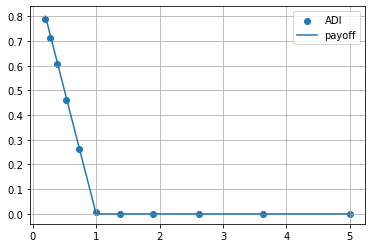

In [19]:
#plt.scatter(Sn, C, label='runge')
plt.scatter(Sn, CAD, label='ADI')
plt.plot(Sn, payoff, label='payoff')
plt.grid()
plt.legend()

np.linalg.norm(C - CAD) / np.linalg.norm(CAD) * 100